## Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv('ETTh2_full.csv')
df.head(10)

,Date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,7/1/2016 0:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,7/1/2016 1:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2,7/1/2016 2:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
3,7/1/2016 3:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
4,7/1/2016 4:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500
5,7/1/2016 5:00,36.773998,10.974,34.928001,9.248,2.036,0.000,30.532000
6,7/1/2016 6:00,39.035999,11.811,37.153000,10.079,2.036,0.000,30.093000
7,7/1/2016 7:00,39.370998,11.309,36.535999,9.409,2.068,0.000,29.872999
8,7/1/2016 8:00,33.925999,8.461,31.899000,6.487,2.015,0.000,29.653000
9,7/1/2016 9:00,38.449001,13.905,37.286999,12.143,1.269,0.000,29.213499


In [2]:
# Converting the dt column to datetime object 
df['Date'] = [pd.to_datetime(x) for x in df['Date']]
df.head(10)

,Date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2,2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
3,2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
4,2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500
5,2016-07-01 05:00:00,36.773998,10.974,34.928001,9.248,2.036,0.000,30.532000
6,2016-07-01 06:00:00,39.035999,11.811,37.153000,10.079,2.036,0.000,30.093000
7,2016-07-01 07:00:00,39.370998,11.309,36.535999,9.409,2.068,0.000,29.872999
8,2016-07-01 08:00:00,33.925999,8.461,31.899000,6.487,2.015,0.000,29.653000
9,2016-07-01 09:00:00,38.449001,13.905,37.286999,12.143,1.269,0.000,29.213499


In [3]:
df = df.sort_values('Date')
df.head(10)

,Date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2,2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
3,2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
4,2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500
5,2016-07-01 05:00:00,36.773998,10.974,34.928001,9.248,2.036,0.000,30.532000
6,2016-07-01 06:00:00,39.035999,11.811,37.153000,10.079,2.036,0.000,30.093000
7,2016-07-01 07:00:00,39.370998,11.309,36.535999,9.409,2.068,0.000,29.872999
8,2016-07-01 08:00:00,33.925999,8.461,31.899000,6.487,2.015,0.000,29.653000
9,2016-07-01 09:00:00,38.449001,13.905,37.286999,12.143,1.269,0.000,29.213499


## Prepare data

In [4]:
INPUT_SIZE = 48 # Dùng `input_size` giờ trước
LABEL_SIZE = 12  # Để dự đoán nhiệt độ trong `label_size` giờ
BATCH_SIZE = 32
FEATURE_FINAL = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'OT']
label_name = 'OT'

In [5]:
def slicing_window(df, df_start_idx, df_end_idx, input_size, label_size, label_name):
    features = [] # Khai báo list dùng để lưu trữ các X
    labels = []   # Khai báo list dùng để lưu trữ các y

    window_size = input_size + label_size # Tính kích thước của window

    # Nếu df_end_idx = chỉ mục cuối cùng bảng dữ liệu, cần phải dời xuống 1 khoảng = window size 
    if df_end_idx == None:
        df_end_idx = len(df) - window_size 
    
    # Duyệt qua từng mẫu dữ liệu
    for idx in range(df_start_idx, df_end_idx):
        feature_end_idx = idx + input_size # Tính chỉ mục kết thúc của X
        label_start_idx = idx + window_size - label_size # Tính chỉ mục bắt đầu của y

        feature = df[idx:feature_end_idx] # Lấy X
        label = df[label_name][label_start_idx:(idx+window_size)] # Lấy y

        features.append(feature) 
        labels.append(label)

    # Chuyển list thành np.ndarrray
    features = np.array(features)
    print(features.shape)
    labels = np.array(labels)

    return features, labels

In [6]:
dataset_length = len(df) # Số lượng mẫu dữ liệu trong DataFrame
TRAIN_SIZE = 0.8         # Tỉ lệ kích thước tập train
VAL_SIZE = 0.1           # Tỉ lệ kích thước tập val

# Đổi tỉ lệ thành chỉ mục
TRAIN_END_IDX = int(TRAIN_SIZE * dataset_length) 
VAL_END_IDX = int(VAL_SIZE * dataset_length) + TRAIN_END_IDX
df = df[FEATURE_FINAL]

# Khởi tạo X, y cho tập train
X_train, y_train = slicing_window(df, 
                                  df_start_idx=0,
                                  df_end_idx=TRAIN_END_IDX,
                                  input_size=INPUT_SIZE,
                                  label_size=LABEL_SIZE,
                                  label_name = label_name)

# Khởi tạo X, y cho tập val
X_val, y_val = slicing_window(df, 
                              df_start_idx=TRAIN_END_IDX,
                              df_end_idx=VAL_END_IDX,
                              input_size=INPUT_SIZE,
                              label_size=LABEL_SIZE,
                              label_name = label_name)

# Khởi tạo X, y cho tập test
X_test, y_test = slicing_window(df, 
                                df_start_idx=VAL_END_IDX,
                                df_end_idx=None,
                                input_size=INPUT_SIZE,
                                label_size=LABEL_SIZE,
                                label_name = label_name)

(13936, 48, 6)
(1742, 48, 6)
(1682, 48, 6)


In [7]:
print(X_train.shape)
print(y_train.shape)

(13936, 48, 6)
(13936, 12)


In [8]:
import tensorflow as tf

# Khởi tạo tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
val_ds   = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

# Cấu hình các tham số tối ưu cho việc đọc dữ liệu
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model and train

In [9]:
# Khai báo normalization layer
normalize_layer = tf.keras.layers.Normalization(axis=-1)
normalize_layer.adapt(np.vstack((X_train, X_val, X_test)))

In [10]:
model = tf.keras.Sequential([tf.keras.Input(shape=(INPUT_SIZE, 6), name='input_layer'), 
                             normalize_layer,  
                             tf.keras.layers.LSTM(32, return_sequences=True), 
                             tf.keras.layers.LSTM(32), 
                             tf.keras.layers.Dense(16),
                             tf.keras.layers.Dense(LABEL_SIZE)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 48, 6)            13        
 n)                                                              
                                                                 
 lstm (LSTM)                 (None, 48, 32)            4992      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,057
Trainable params: 14,044
Non-trainable params: 13
___________________________________________________

In [11]:
# Khai báo một số giá trị siêu tham số
EPOCHS = 30
LR = 1e-3

# Cấu hình một số thông tin cho mô hình
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.MeanAbsoluteError())
history = model.fit(train_ds, 
                    validation_data=val_ds,
                    epochs=EPOCHS)

Epoch 1/30
436/436 [==============================] - 22s 41ms/step - loss: 12.0202 - val_loss: 8.6170
Epoch 2/30
436/436 [==============================] - 18s 42ms/step - loss: 6.9503 - val_loss: 6.0532
Epoch 3/30
436/436 [==============================] - 16s 36ms/step - loss: 7.3392 - val_loss: 4.9184
Epoch 4/30
436/436 [==============================] - 16s 37ms/step - loss: 6.5960 - val_loss: 4.5185
Epoch 5/30
436/436 [==============================] - 17s 40ms/step - loss: 6.5842 - val_loss: 4.5039
Epoch 6/30
436/436 [==============================] - 15s 34ms/step - loss: 5.7729 - val_loss: 4.8842
Epoch 7/30
436/436 [==============================] - 15s 34ms/step - loss: 5.0896 - val_loss: 4.4717
Epoch 8/30
436/436 [==============================] - 14s 33ms/step - loss: 4.7071 - val_loss: 4.4011
Epoch 9/30
436/436 [==============================] - 14s 33ms/step - loss: 4.4745 - val_loss: 4.4202
Epoch 10/30
436/436 [==============================] - 14s 32ms/step - loss: 4.21

In [12]:
# Đánh giá mô hình trên tập test
test_evaluation = model.evaluate(test_ds)

53/53 [==============================] - 0s 9ms/step - loss: 3.2771


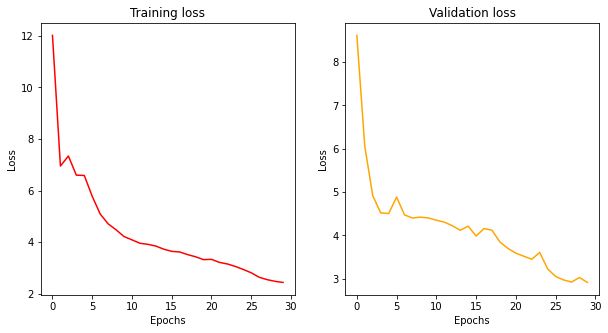

In [13]:
train_loss = history.history['loss']# Đọc thông tin loss trên tập train
val_loss = history.history['val_loss'] # Đọc thông tin loss trên tập val

plt.figure(figsize=(10, 5)) # Cài đặt kích thước khung ảnh

plt.subplot(1, 2, 1) # Khởi tạo khung ảnh cho training loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Training loss') # Hiển thị title của khung ảnh hiện tại là 'Training Loss'
plt.plot(train_loss, color='red') # Vẽ đường giá trị loss trên tập train qua từng epoch (đường vẽ màu đỏ)

plt.subplot(1, 2, 2) # Khởi tạo khung ảnh cho val loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Validation loss') # Hiển thị title của khung ảnh hiện tại là 'Validation loss'
plt.plot(val_loss, color='orange') # Vẽ đường giá trị loss trên tập val qua từng epoch (đường vẽ màu đỏ)

plt.show() # Hiển thị 2 khung ảnh nhỏ